## Data Preparartion :

In [22]:
# Install the following dependencies before performing import
import os
from glob import glob
import shutil
from tqdm import tqdm
import dicom2nifti
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
#!pip install monai

In [2]:
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
)
from monai.data import DataLoader, Dataset, CacheDataset
from monai.utils import set_determinism

### For Data:  
Go to Website :http://medicaldecathlon.com/ then click Get data . Download Liver Medical Images named Task_03liver.tar ; https://drive.google.com/file/d/1jyVGUGyxKBXV6_9ivuZapQS8eUJXCIpu/view?usp=sharing. The folder contains Training images and their labels and Test images.

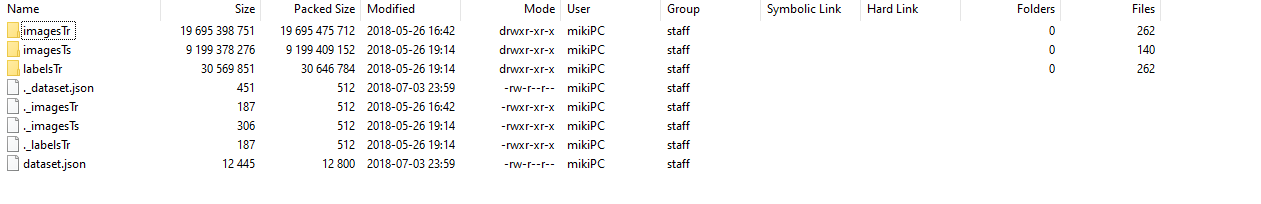

The .nii.gz extension is compressed nifti files of Medical images of patients.The 3D slicer 4.11 is used to open the compressed nifti files and to create dicom files for each patient. The dicom file is just the ungrouped files previously grouped as nifti files. After conversion you will find that the dicom files numbers are not constant for each patients but varies from say 100- 420 images. Therefore using function create_groups ,group of 65 images is created for consistency, which are again grouped back to nifti file extension using function dcm2nifti. Similar steps are followed for Training Label images as well.
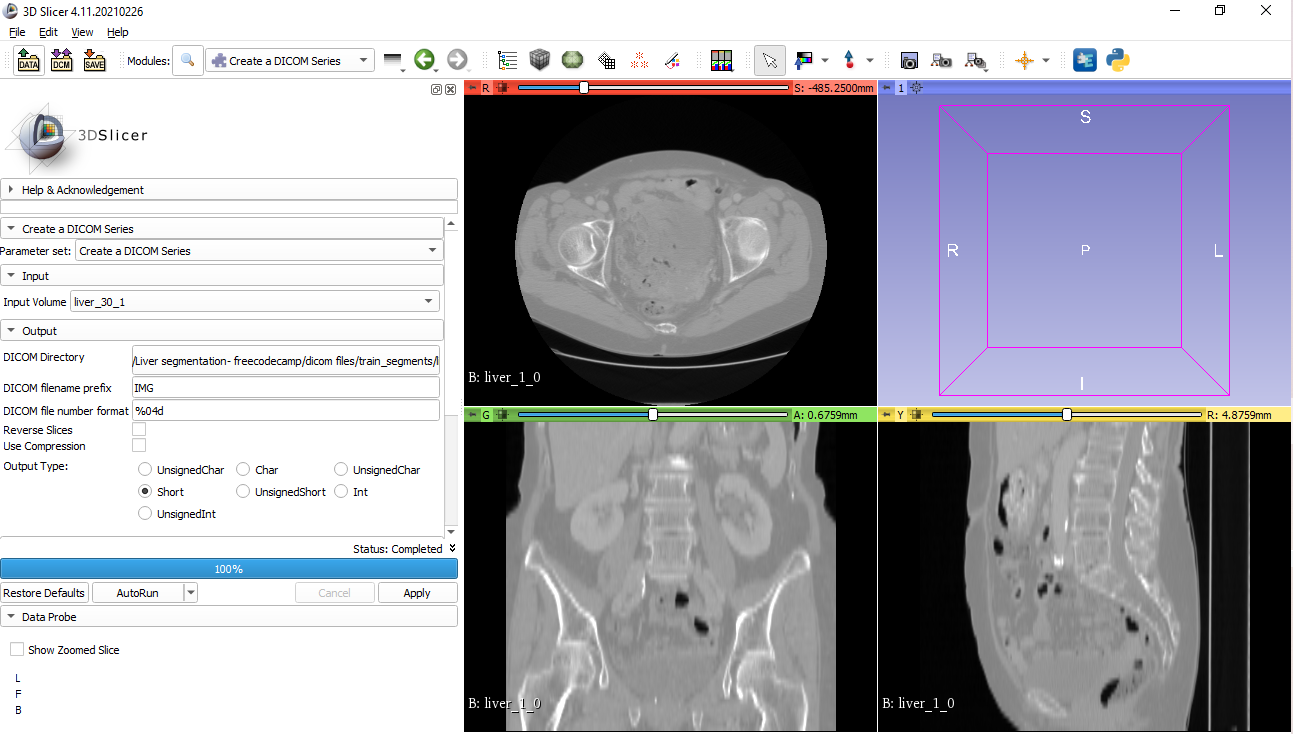

In [3]:
def create_groups(in_dir, out_dir, Number_slices):
    '''
    This function is to get the last part of the path so that we can use it to name the folder.
    `in_dir`: the path to your folders that contain dicom files
    `out_dir`: the path where you want to put the converted nifti files
    `Number_slices`: here you put the number of slices that you need for your project and it will 
    create groups with this number.
    '''

    for patient in glob(in_dir + '/*'):
        patient_name = os.path.basename(os.path.normpath(patient))

        # Here we need to calculate the number of folders which mean into how many groups we will divide the number of slices
        number_folders = int(len(glob(patient + '/*')) / Number_slices)

        for i in range(number_folders):
            output_path = os.path.join(out_dir, patient_name + '_' + str(i))
            os.mkdir(output_path)

            # Move the slices into a specific folder so that you will save memory in your desk
            for i, file in enumerate(glob(patient + '/*')):
                if i == Number_slices + 1:
                    break
                
                shutil.move(file, output_path)

In [8]:
# Preparing training dataset
#volumes
in_dir_images = "D:/Liver segmentation/dicom files/train_volumes"
out_dir_images = "D:/Liver segmentation/dicom_groups/train_volumes"
Number_slices = 64
create_groups(in_dir_images, out_dir_images, Number_slices)

In [9]:
# Preparing training dataset
#Segments aka Labels
in_dir_labels = "D:/Liver segmentation/dicom files/train_segments"
out_dir_labels = "D:/Liver segmentation/dicom_groups/train_segments"
Number_slices = 64
create_groups(in_dir_labels, out_dir_labels, Number_slices)

In [14]:
# Preparing validation dataset
#volumes
in_dir_images = "D:/Liver segmentation/dicom files/valid_volumes"
out_dir_images = "D:/Liver segmentation/dicom_groups/valid_volumes"
Number_slices = 64
create_groups(in_dir_images, out_dir_images, Number_slices)

In [15]:
# Preparing validation dataset
#Segments aka Labels
in_dir_labels = "D:/Liver segmentation/dicom files/valid_segments"
out_dir_labels = "D:/Liver segmentation/dicom_groups/valid_segments"
Number_slices = 64
create_groups(in_dir_labels, out_dir_labels, Number_slices)

In [4]:
# Preparing test dataset
#volumes
in_dir_images = "D:/Liver segmentation/dicom files/test_volumes"
out_dir_images = "D:/Liver segmentation/dicom_groups/test_volumes"
Number_slices = 64
create_groups(in_dir_images, out_dir_images, Number_slices)

In [5]:
# Preparing test dataset
#Segments aka Labels
in_dir_labels = "D:/Liver segmentation/dicom files/test_segments"
out_dir_labels = "D:/Liver segmentation/dicom_groups/test_segments"
Number_slices = 64
create_groups(in_dir_labels, out_dir_labels, Number_slices)

### Converting dcm to nifti file type

In [6]:
def dcm2nifti(in_dir, out_dir):
    '''
    This function will be used to convert dicoms into nifti files after creating the groups with 
    the number of slices that you want.
    `in_dir`: the path to the folder where you have all the patients (folder of all the groups).
    `out_dir`: the path to the output, which means where you want to save the converted nifties.
    '''

    for folder in tqdm(glob(in_dir + '/*')):
        patient_name = os.path.basename(os.path.normpath(folder))
        dicom2nifti.dicom_series_to_nifti(folder, os.path.join(out_dir, patient_name + '.nii.gz'))

#### Train_set

In [56]:
in_dir_images = "D:/Liver segmentation/dicom_groups/images"
out_dir_images = "D:/Liver segmentation/test_train_dataset/images"
dcm2nifti(in_dir_images, out_dir_images)

0it [00:00, ?it/s]


In [12]:
in_dir_labels = "D:/Liver segmentation/dicom_groups/labels"
out_dir_labels = "D:/Liver segmentation/test_train_dataset/labels"
dcm2nifti(in_dir_labels, out_dir_labels)

100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [04:01<00:00,  3.10s/it]


#### valid_set

In [17]:
in_dir_images = "D:/Liver segmentation/dicom_groups/valid_volumes"
out_dir_images = "D:/Liver segmentation/test_train_dataset/valid_volumes"
dcm2nifti(in_dir_images, out_dir_images)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:38<00:00,  4.33s/it]


In [18]:
in_dir_labels = "D:/Liver segmentation/dicom_groups/valid_segments"
out_dir_labels = "D:/Liver segmentation/test_train_dataset/valid_segments"
dcm2nifti(in_dir_labels, out_dir_labels)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:15<00:00,  1.75s/it]


#### Test_set

In [7]:
in_dir_images = "D:/Liver segmentation/dicom_groups/test_volumes"
out_dir_images = "D:/Liver segmentation/test_train_dataset/test_volumes"
dcm2nifti(in_dir_images, out_dir_images)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.11s/it]


In [8]:
in_dir_labels = "D:/Liver segmentation/dicom_groups/test_segments"
out_dir_labels = "D:/Liver segmentation/test_train_dataset/test_segments"
dcm2nifti(in_dir_labels, out_dir_labels)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.81s/it]


The Test train Dataset prepared finally !
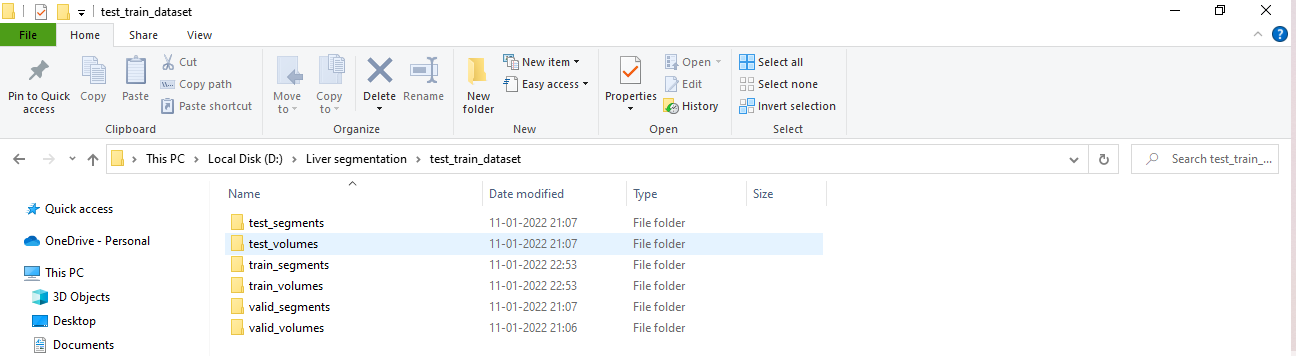

### Remove empty volumes from training ,validation,testing datasets 
The nifti files after grouping 65 individual image files for each patients or dcm files to grouped nifti files . we will be removing the those nifti files which are missing Liver labelling in it. 

In [10]:
def find_empty(in_dir):
    '''
    This function will help you to find the Non-empty volumes that you will need for your training
    so instead of opening all the files and search for the Non - empty ones, use this function to make it quick.
    '''
    
    list_patients = []
    for patient in glob(os.path.join(in_dir, '*')):
        img = nib.load(patient)
        ## Based on the label count in the nifti files, 1: Background, 2: Background+ foreground
        if len(np.unique(img.get_fdata())) > 2:
            #print(os.path.basename(os.path.normpath(patient)))
            list_patients.append(os.path.basename(os.path.normpath(patient)))
    
    return list_patients

#### From training set

In [27]:
in_dir = "D:/Liver segmentation/nifti_files/train_segments"
find_empty(in_dir)

liver_0_0.nii.gz
liver_10_5.nii.gz
liver_10_6.nii.gz
liver_1_0.nii.gz
liver_2_6.nii.gz
liver_2_7.nii.gz
liver_3_5.nii.gz
liver_4_5.nii.gz
liver_4_6.nii.gz
liver_4_7.nii.gz
liver_4_8.nii.gz
liver_4_9.nii.gz
liver_5_6.nii.gz
liver_5_7.nii.gz
liver_6_5.nii.gz
liver_6_6.nii.gz
liver_6_7.nii.gz
liver_7_5.nii.gz
liver_7_6.nii.gz
liver_7_7.nii.gz
liver_8_5.nii.gz
liver_8_6.nii.gz
liver_8_7.nii.gz
liver_9_5.nii.gz
liver_9_6.nii.gz
liver_9_7.nii.gz


['liver_0_0.nii.gz',
 'liver_10_5.nii.gz',
 'liver_10_6.nii.gz',
 'liver_1_0.nii.gz',
 'liver_2_6.nii.gz',
 'liver_2_7.nii.gz',
 'liver_3_5.nii.gz',
 'liver_4_5.nii.gz',
 'liver_4_6.nii.gz',
 'liver_4_7.nii.gz',
 'liver_4_8.nii.gz',
 'liver_4_9.nii.gz',
 'liver_5_6.nii.gz',
 'liver_5_7.nii.gz',
 'liver_6_5.nii.gz',
 'liver_6_6.nii.gz',
 'liver_6_7.nii.gz',
 'liver_7_5.nii.gz',
 'liver_7_6.nii.gz',
 'liver_7_7.nii.gz',
 'liver_8_5.nii.gz',
 'liver_8_6.nii.gz',
 'liver_8_7.nii.gz',
 'liver_9_5.nii.gz',
 'liver_9_6.nii.gz',
 'liver_9_7.nii.gz']

In [74]:
in_dir = "D:/Liver segmentation/test_train_dataset/train_segments/more_segments"
find_empty(in_dir)

['liver_21_5.nii.gz',
 'liver_22_1.nii.gz',
 'liver_22_2.nii.gz',
 'liver_23_4.nii.gz',
 'liver_23_5.nii.gz',
 'liver_24_3.nii.gz',
 'liver_25_7.nii.gz',
 'liver_25_8.nii.gz',
 'liver_26_4.nii.gz',
 'liver_26_5.nii.gz',
 'liver_26_6.nii.gz',
 'liver_27_5.nii.gz',
 'liver_27_6.nii.gz',
 'liver_27_7.nii.gz',
 'liver_27_8.nii.gz',
 'liver_28_0.nii.gz',
 'liver_28_1.nii.gz',
 'liver_29_0.nii.gz',
 'liver_29_1.nii.gz',
 'liver_30_1.nii.gz',
 'liver_30_2.nii.gz']

#### Validation Set

In [11]:
in_dir = "D:/Liver segmentation/test_train_dataset/valid_segments"
find_empty(in_dir)

['liver_20_7.nii.gz', 'liver_40_0.nii.gz']

#### Test Set

In [12]:
in_dir = "D:/Liver segmentation/test_train_dataset/test_segments"
find_empty(in_dir)

['liver_60_2.nii.gz']

In [13]:
def prepare(in_dir, pixdim=(1.5, 1.5, 1.0), a_min=-200, a_max=200, spatial_size=[128,128,64], cache=False):

    """
    This function is for preprocessing, it contains only the basic transforms, but you can add more operations that you 
    find in the Monai documentation.
    https://monai.io/docs.html
    """

    set_determinism(seed=0)

    path_train_volumes = sorted(glob(os.path.join(in_dir, "train_volumes", "*.nii.gz")))
    path_train_segmentation = sorted(glob(os.path.join(in_dir, "train_segments", "*.nii.gz")))

    path_valid_volumes = sorted(glob(os.path.join(in_dir, "valid_volumes", "*.nii.gz")))
    path_valid_segmentation = sorted(glob(os.path.join(in_dir, "valid_segments", "*.nii.gz")))

    train_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_train_volumes, path_train_segmentation)]
    valid_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_valid_volumes, path_valid_segmentation)]

    train_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            AddChanneld(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max, b_min=0.0, b_max=1.0, clip=True), 
            CropForegroundd(keys=["vol", "seg"], source_key="vol"),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),   
            ToTensord(keys=["vol", "seg"]),

        ]
    )

    valid_transforms = Compose(
        [
            LoadImaged(keys=["vol", "seg"]),
            AddChanneld(keys=["vol", "seg"]),
            Spacingd(keys=["vol", "seg"], pixdim=pixdim, mode=("bilinear", "nearest")),
            Orientationd(keys=["vol", "seg"], axcodes="RAS"),
            ScaleIntensityRanged(keys=["vol"], a_min=a_min, a_max=a_max,b_min=0.0, b_max=1.0, clip=True), 
            CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
            Resized(keys=["vol", "seg"], spatial_size=spatial_size),   
            ToTensord(keys=["vol", "seg"]),

            
        ]
    )

    if cache:
        train_ds = CacheDataset(data=train_files, transform=train_transforms,cache_rate=1.0)
        train_loader = DataLoader(train_ds, batch_size=1)

        valid_ds = CacheDataset(data=valid_files, transform=valid_transforms, cache_rate=1.0)
        valid_loader = DataLoader(valid_ds, batch_size=1)

        return train_loader, valid_loader

    else:
        train_ds = Dataset(data=train_files, transform=train_transforms)
        train_loader = DataLoader(train_ds, batch_size=1)

        valid_ds = Dataset(data=valid_files, transform=valid_transforms)
        valid_loader = DataLoader(valid_ds, batch_size=1)

        return train_loader, valid_loader



## Training :

In [14]:
from monai.networks.nets import UNet
from monai.networks.layers import Norm
from monai.losses import DiceLoss, DiceCELoss

In [75]:
data_dir = "D:/Liver segmentation/test_train_dataset"
model_dir = "D:/Liver segmentation/results/results" 
data_in = prepare(data_dir, cache=True)

Loading dataset: 100%|███████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.40s/it]


In [15]:
import torch
torch.__version__

'1.6.0+cu101'

In [76]:
model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
)


#loss_function = DiceCELoss(to_onehot_y=True, sigmoid=True, squared_pred=True, ce_weight=calculate_weights(1792651250,2510860).to(device))
loss_function = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-5, weight_decay=1e-5, amsgrad=True)

In [77]:
def dice_metric(predicted, target):
    '''
    In this function we take `predicted` and `target` (label) to calculate the dice coeficient then we use it 
    to calculate a metric value for the training and the validation.
    '''
    dice_value = DiceLoss(to_onehot_y=True, sigmoid=True, squared_pred=True)
    value = 1 - dice_value(predicted, target).item()
    return value

In [78]:
def train(model, data_in, loss, optim, max_epochs, model_dir, test_interval=1 ):
    best_metric = -1
    best_metric_epoch = -1
    save_loss_train = []
    save_loss_test = []
    save_metric_train = []
    save_metric_test = []
    train_loader, test_loader = data_in

    for epoch in range(max_epochs):
        print("-" * 10)
        print(f"epoch {epoch + 1}/{max_epochs}")
        model.train()
        train_epoch_loss = 0
        train_step = 0
        epoch_metric_train = 0
        for batch_data in train_loader:
            
            train_step += 1

            volume = batch_data["vol"]
            label = batch_data["seg"]
            label = label != 0
            #volume, label = (volume.to(device), label.to(device))

            optim.zero_grad()
            outputs = model(volume)
            
            train_loss = loss(outputs, label)
            
            train_loss.backward()
            optim.step()

            train_epoch_loss += train_loss.item()
            print(
                f"{train_step}/{len(train_loader) // train_loader.batch_size}, "
                f"Train_loss: {train_loss.item():.4f}")

            train_metric = dice_metric(outputs, label)
            epoch_metric_train += train_metric
            print(f'Train_dice: {train_metric:.4f}')

        print('-'*20)
        
        train_epoch_loss /= train_step
        print(f'Epoch_loss: {train_epoch_loss:.4f}')
        save_loss_train.append(train_epoch_loss)
        np.save(os.path.join(model_dir, 'loss_train.npy'), save_loss_train)
        
        epoch_metric_train /= train_step
        print(f'Epoch_metric: {epoch_metric_train:.4f}')

        save_metric_train.append(epoch_metric_train)
        np.save(os.path.join(model_dir, 'metric_train.npy'), save_metric_train)

        if (epoch + 1) % test_interval == 0:

            model.eval()
            with torch.no_grad():
                test_epoch_loss = 0
                test_metric = 0
                epoch_metric_test = 0
                test_step = 0

                for test_data in test_loader:

                    test_step += 1

                    test_volume = test_data["vol"]
                    test_label = test_data["seg"]
                    test_label = test_label != 0
                    #test_volume, test_label = (test_volume.to(device), test_label.to(device),)
                    
                    test_outputs = model(test_volume)
                    
                    test_loss = loss(outputs, test_label)
                    test_epoch_loss += test_loss.item()
                    test_metric = dice_metric(test_outputs, test_label)
                    epoch_metric_test += test_metric
                    
                
                test_epoch_loss /= test_step
                print(f'test_loss_epoch: {test_epoch_loss:.4f}')
                save_loss_test.append(test_epoch_loss)
                np.save(os.path.join(model_dir, 'loss_test.npy'), save_loss_test)

                epoch_metric_test /= test_step
                print(f'test_dice_epoch: {epoch_metric_test:.4f}')
                save_metric_test.append(epoch_metric_test)
                np.save(os.path.join(model_dir, 'metric_test.npy'), save_metric_test)

                if epoch_metric_test > best_metric:
                    best_metric = epoch_metric_test
                    best_metric_epoch = epoch + 1
                    torch.save(model.state_dict(), os.path.join(
                        model_dir, "best_metric_model.pth"))
                
                print(
                    f"current epoch: {epoch + 1} current mean dice: {test_metric:.4f}"
                    f"\nbest mean dice: {best_metric:.4f} "
                    f"at epoch: {best_metric_epoch}"
                )


    print(
        f"train completed, best_metric: {best_metric:.4f} "
        f"at epoch: {best_metric_epoch}")

In [ ]:
train(model, data_in, loss_function, optimizer, 100, model_dir)

In [80]:
train_loss = np.load(os.path.join(model_dir, 'loss_train.npy'))
train_metric = np.load(os.path.join(model_dir, 'metric_train.npy'))
valid_loss = np.load(os.path.join(model_dir, 'loss_test.npy'))
valid_metric = np.load(os.path.join(model_dir, 'metric_test.npy'))

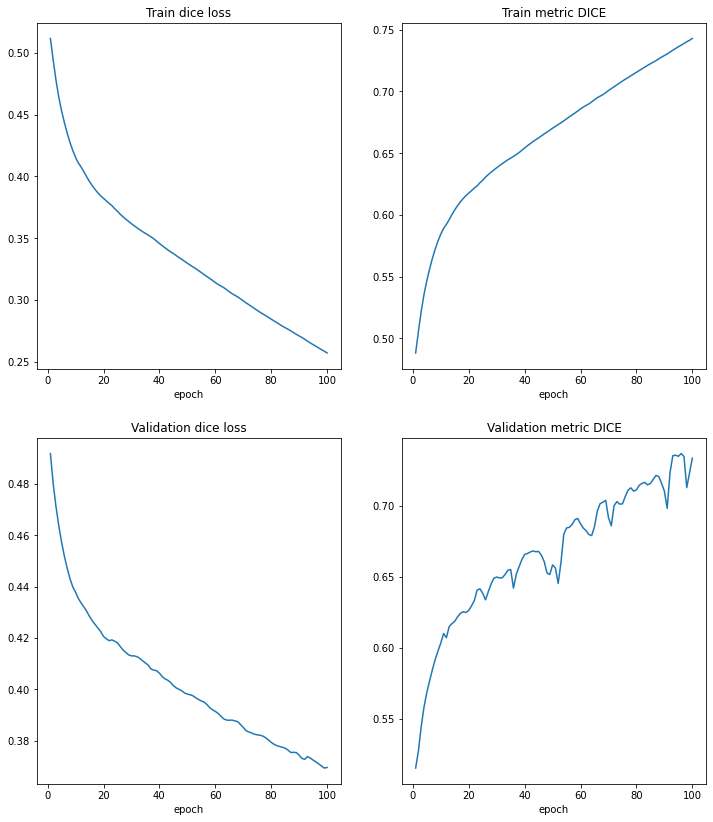

In [81]:
plt.figure("Results ", (12, 14))
plt.subplot(2, 2, 1)
plt.title("Train dice loss")
x = [i + 1 for i in range(len(train_loss))]
y = train_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 2)
plt.title("Train metric DICE")
x = [i + 1 for i in range(len(train_metric))]
y = train_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 3)
plt.title("Validation dice loss")
x = [i + 1 for i in range(len(valid_loss))]
y = valid_loss
plt.xlabel("epoch")
plt.plot(x, y)

plt.subplot(2, 2, 4)
plt.title("Validation metric DICE")
x = [i + 1 for i in range(len(valid_metric))]
y = valid_metric
plt.xlabel("epoch")
plt.plot(x, y)

plt.show()

## Testing :

In [82]:
from monai.utils import first, set_determinism
from monai.transforms import(
    Compose,
    AddChanneld,
    LoadImaged,
    Resized,
    ToTensord,
    Spacingd,
    Orientationd,
    ScaleIntensityRanged,
    CropForegroundd,
    Activations,
)

from monai.data import CacheDataset, DataLoader, Dataset

import torch
import matplotlib.pyplot as plt
from monai.inferers import sliding_window_inference

In [83]:
in_dir = "D:/Liver segmentation/test_train_dataset"

In [84]:

path_test_volumes = sorted(glob(os.path.join(in_dir, "test_volumes", "*.nii.gz")))
path_test_segmentation = sorted(glob(os.path.join(in_dir, "test_segments", "*.nii.gz")))

test_files = [{"vol": image_name, "seg": label_name} for image_name, label_name in zip(path_test_volumes, path_test_segmentation)]
#test_files = test_files[0:9]

In [85]:
test_transforms = Compose(
    [
        LoadImaged(keys=["vol", "seg"]),
        AddChanneld(keys=["vol", "seg"]),
        Spacingd(keys=["vol", "seg"], pixdim=(1.5,1.5,1.0), mode=("bilinear", "nearest")),
        Orientationd(keys=["vol", "seg"], axcodes="RAS"),
        ScaleIntensityRanged(keys=["vol"], a_min=-200, a_max=200,b_min=0.0, b_max=1.0, clip=True), 
        CropForegroundd(keys=['vol', 'seg'], source_key='vol'),
        Resized(keys=["vol", "seg"], spatial_size=[128,128,64]),   
        ToTensord(keys=["vol", "seg"]),
    ]
)

In [86]:
test_ds = Dataset(data=test_files, transform=test_transforms)
test_loader = DataLoader(test_ds, batch_size=1)

In [87]:
# Creating Instance of UNet
#device = torch.device("cuda:0")
model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=2,
    channels=(16, 32, 64, 128, 256), 
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=Norm.BATCH,
)#.to(device)

In [88]:
#Adding trained weights 
model.load_state_dict(torch.load(
    os.path.join(model_dir, "best_metric_model.pth")))
model.eval()

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (N): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
      )
      (residual): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
    )
    (1): SkipConnection(
      (submodule): Sequential(
        (0): ResidualUnit(
          (conv): Sequential(


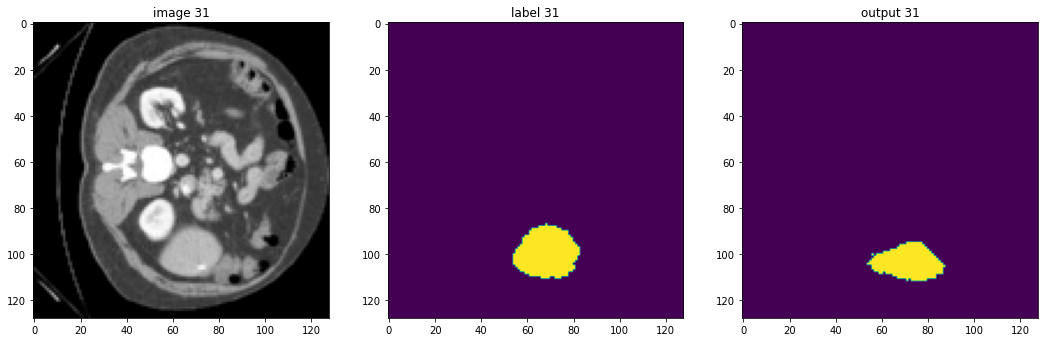

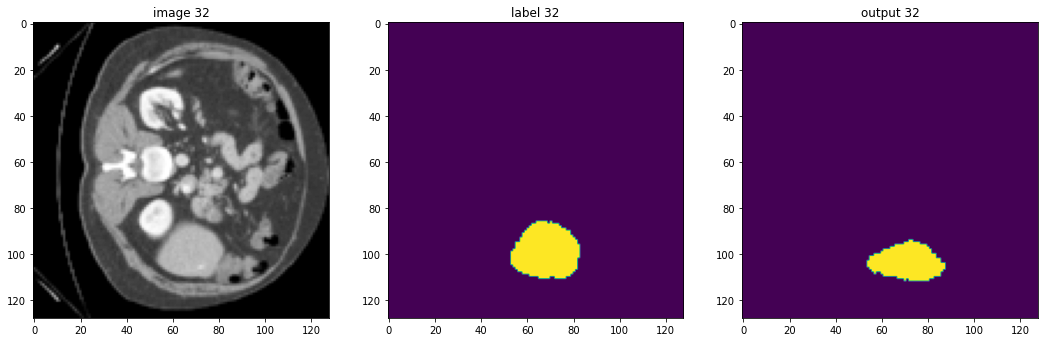

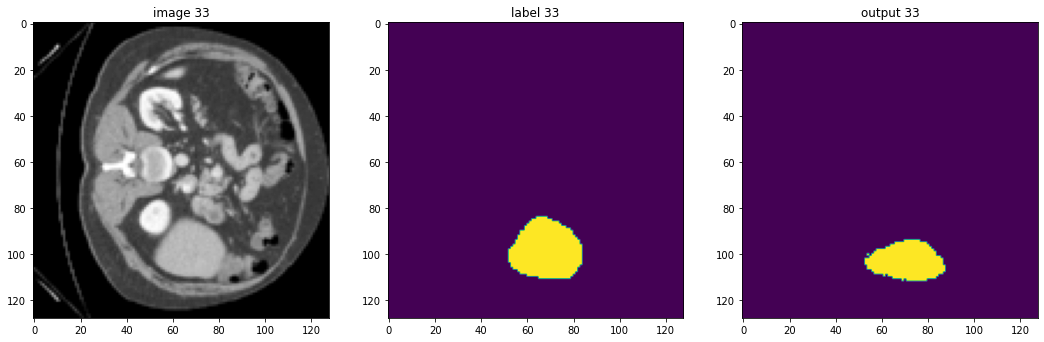

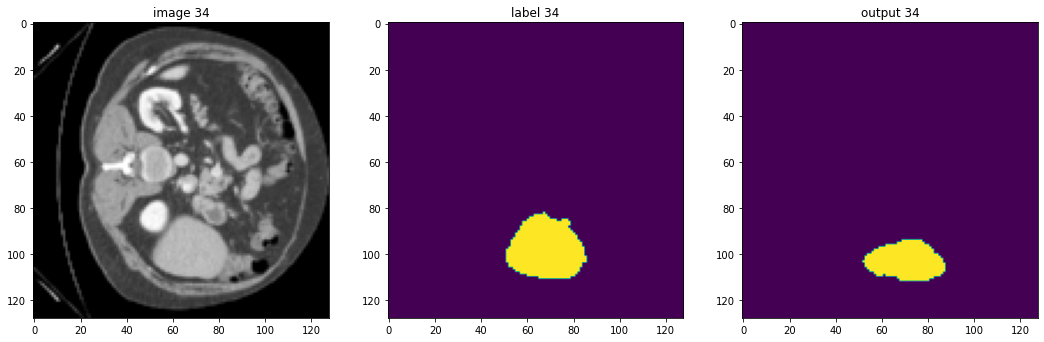

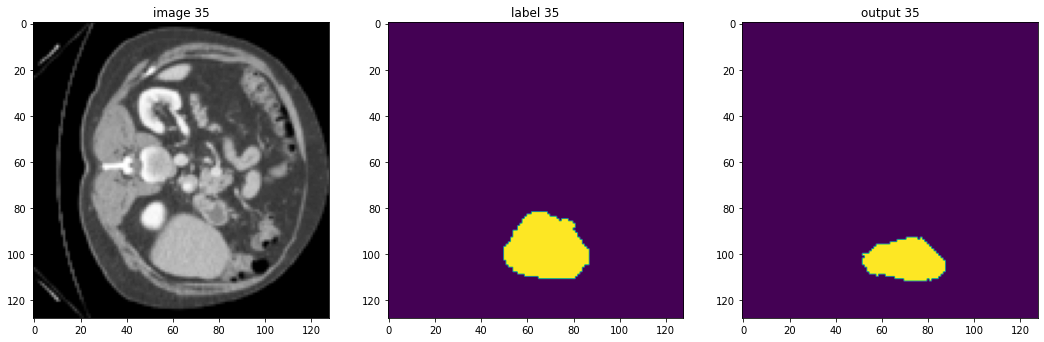

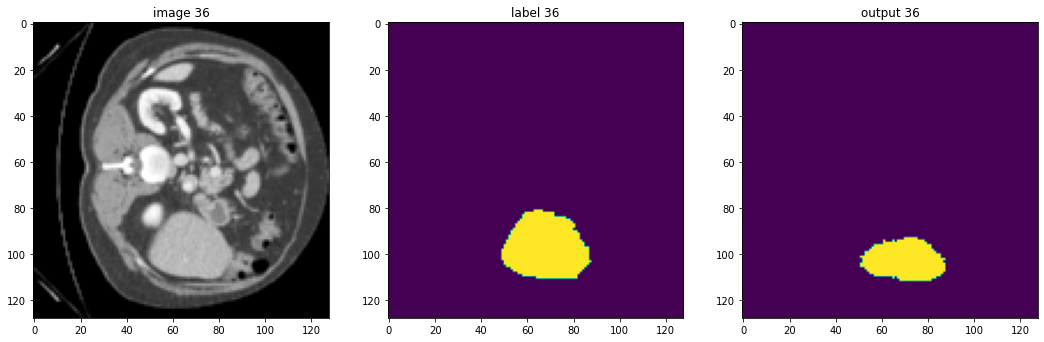

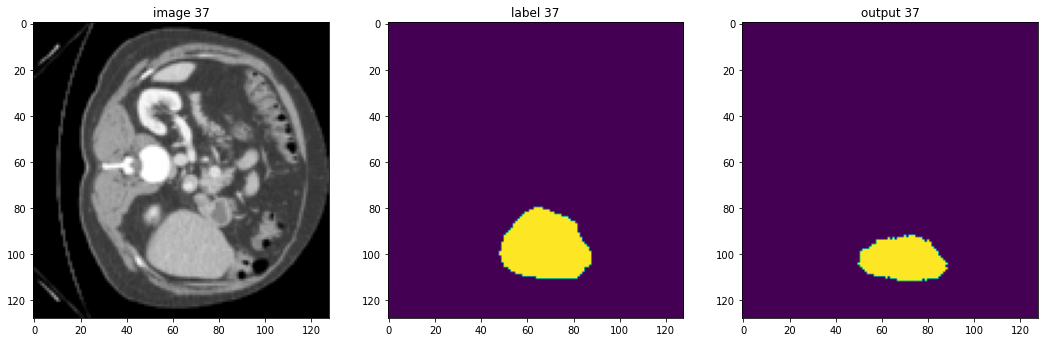

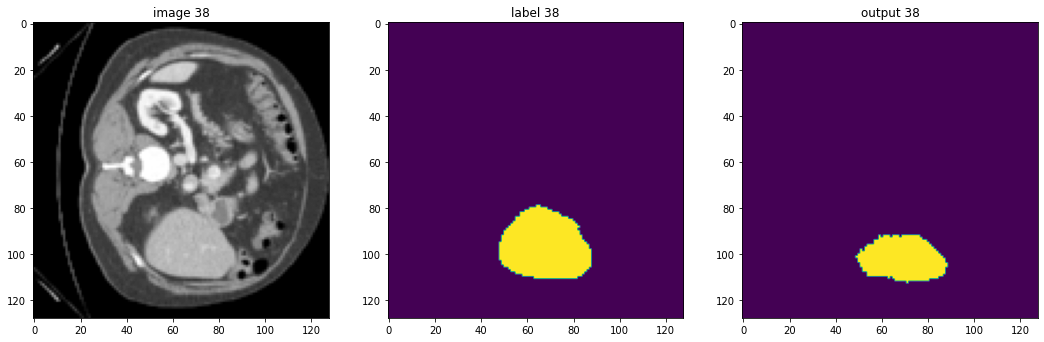

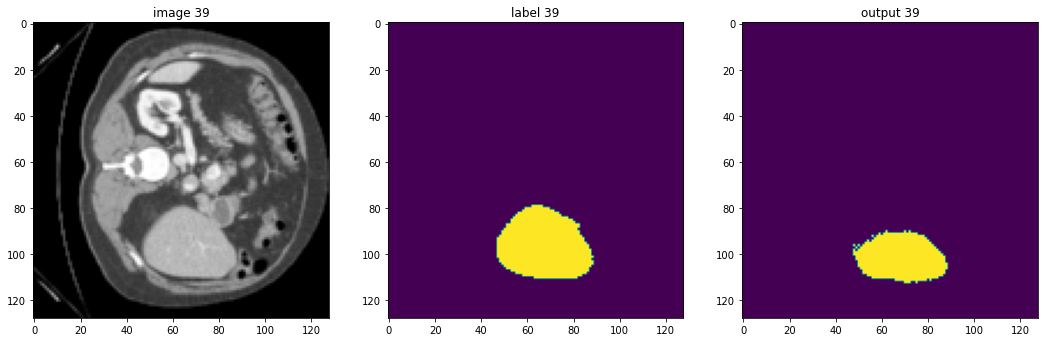

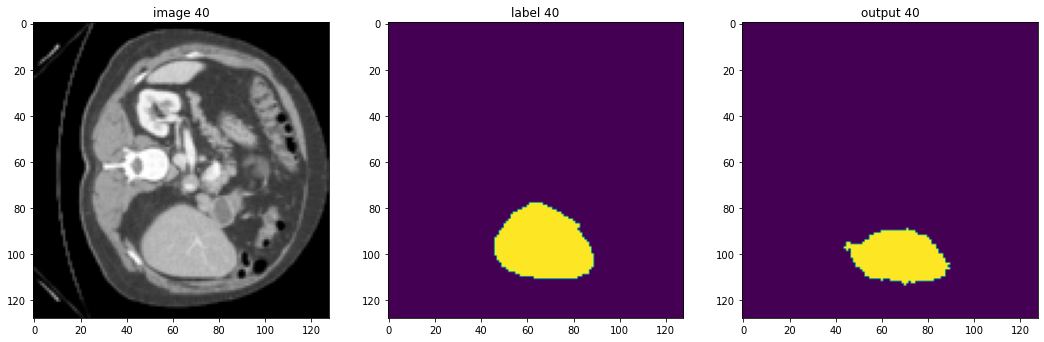

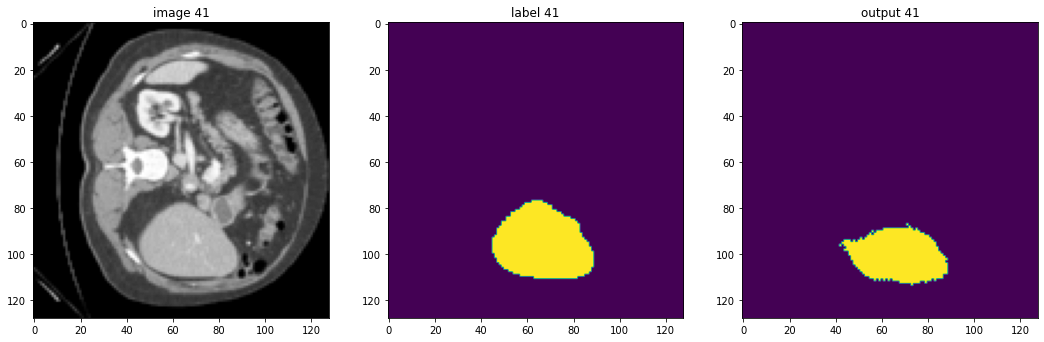

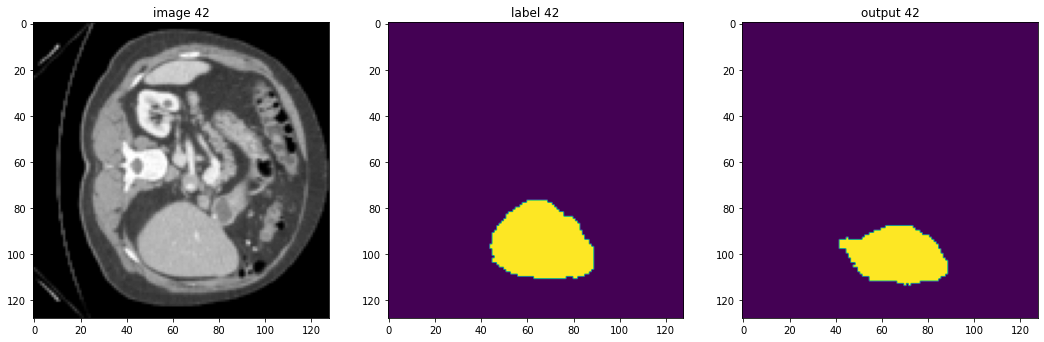

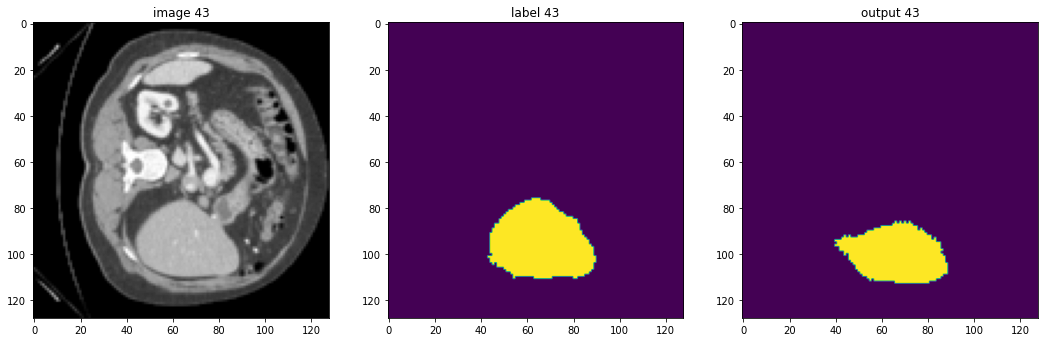

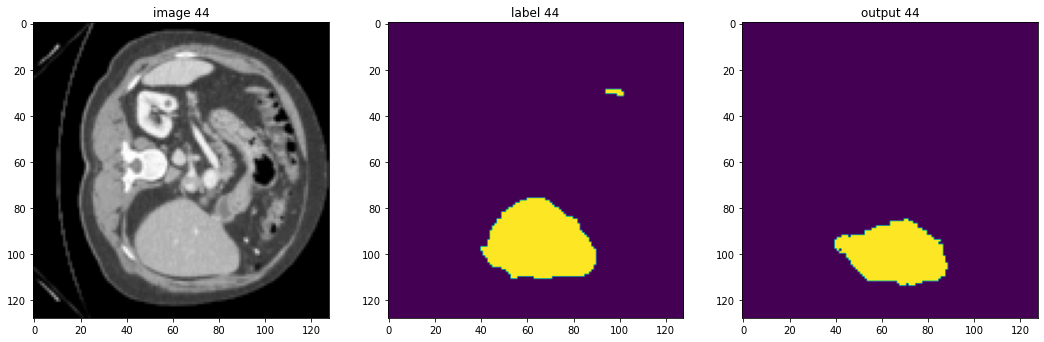

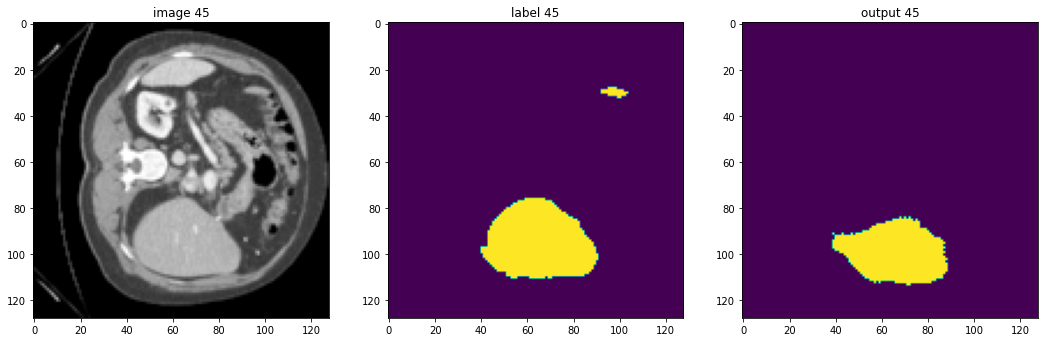

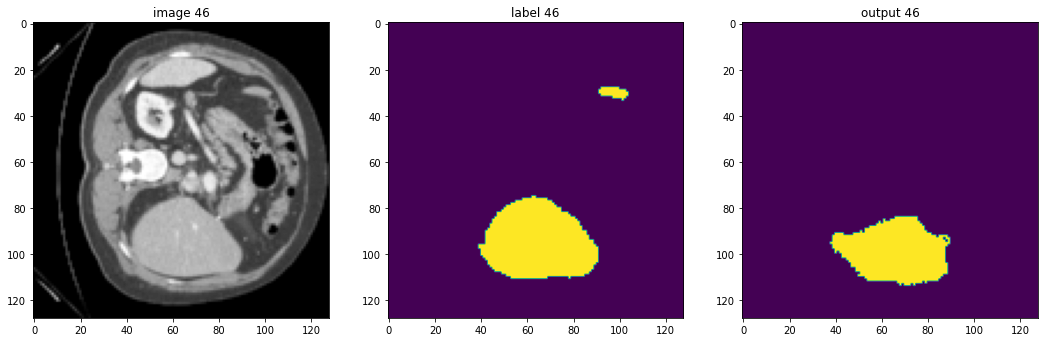

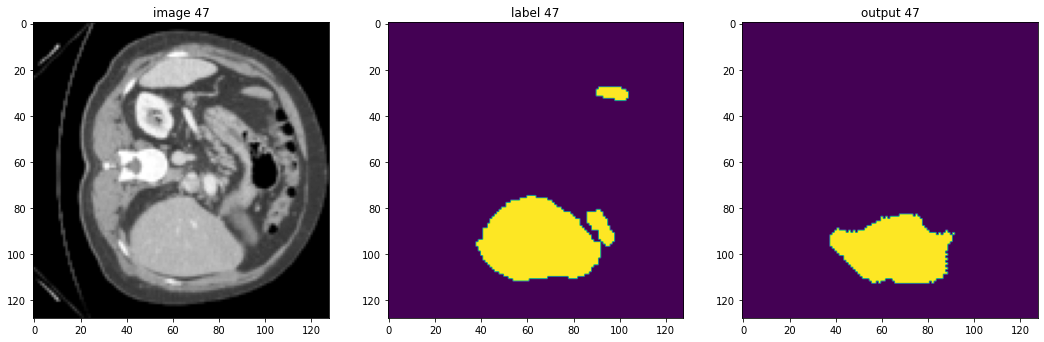

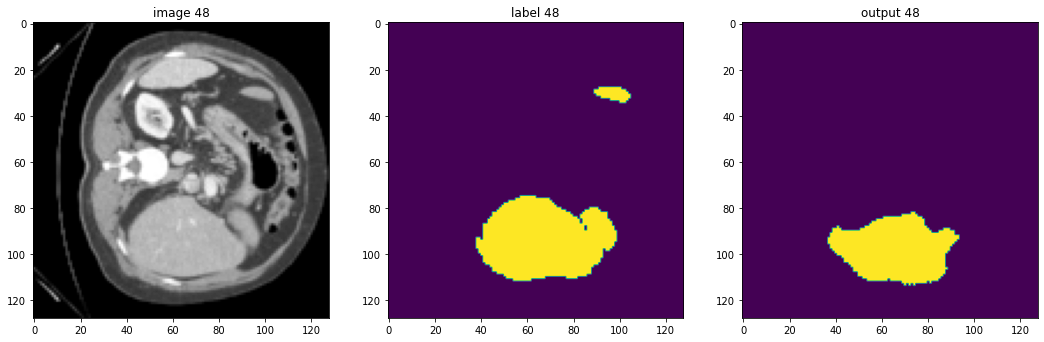

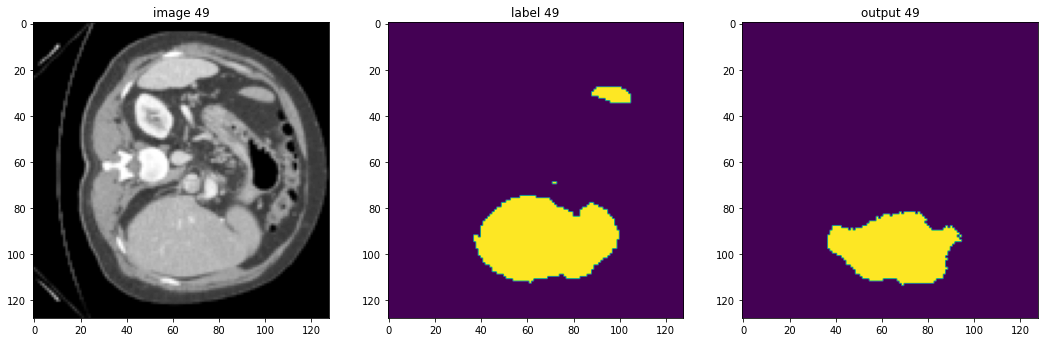

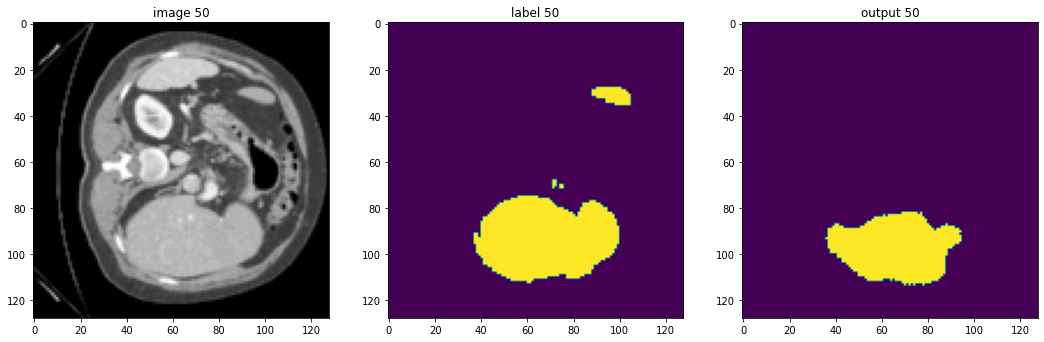

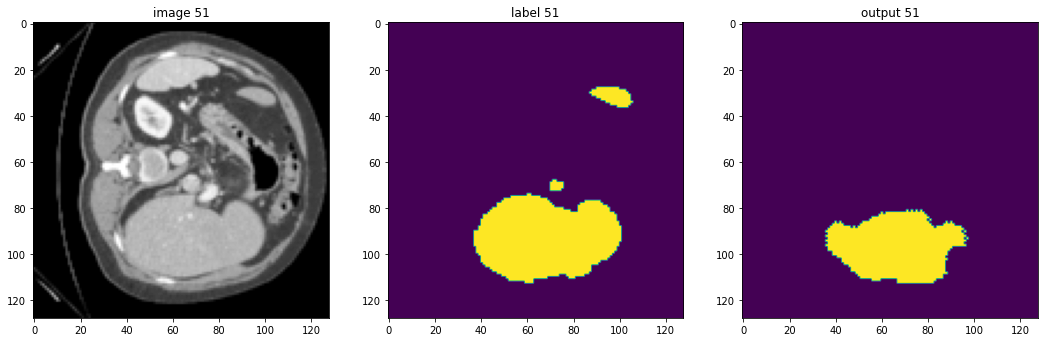

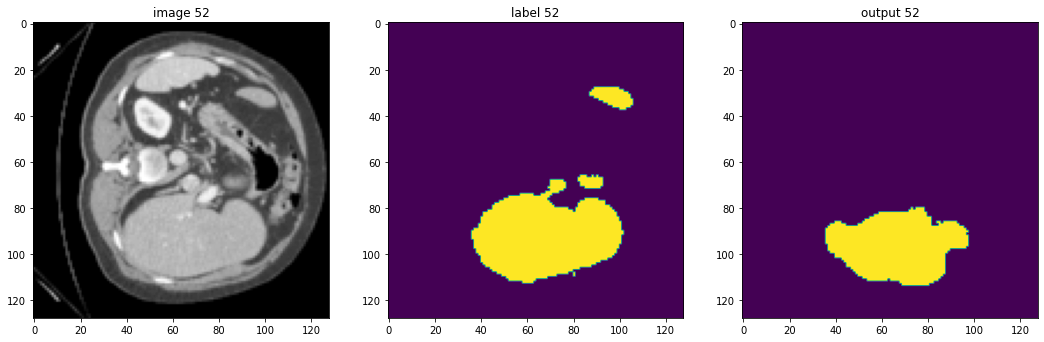

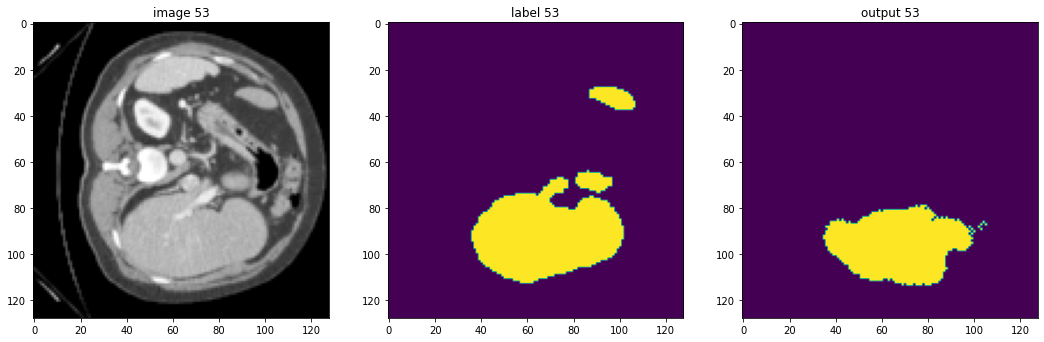

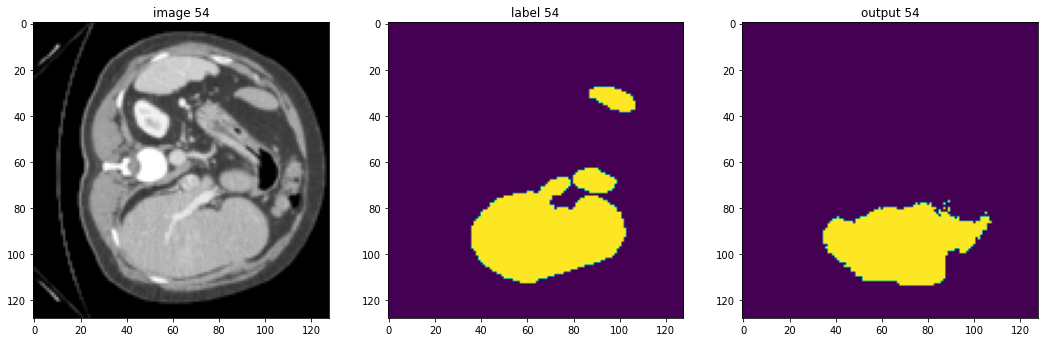

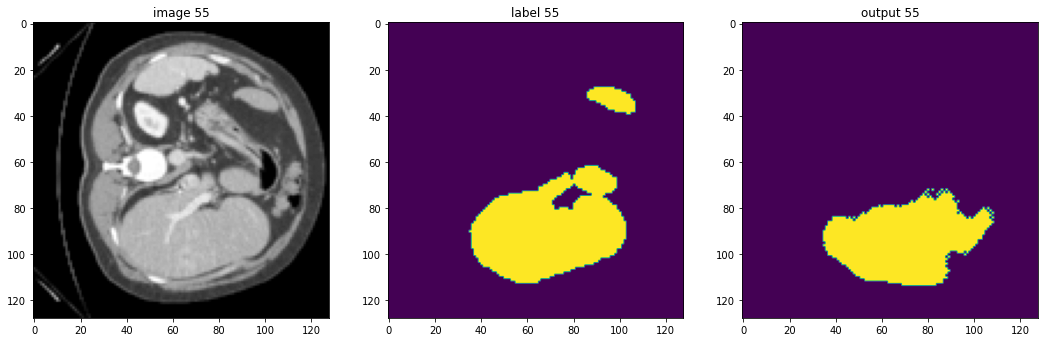

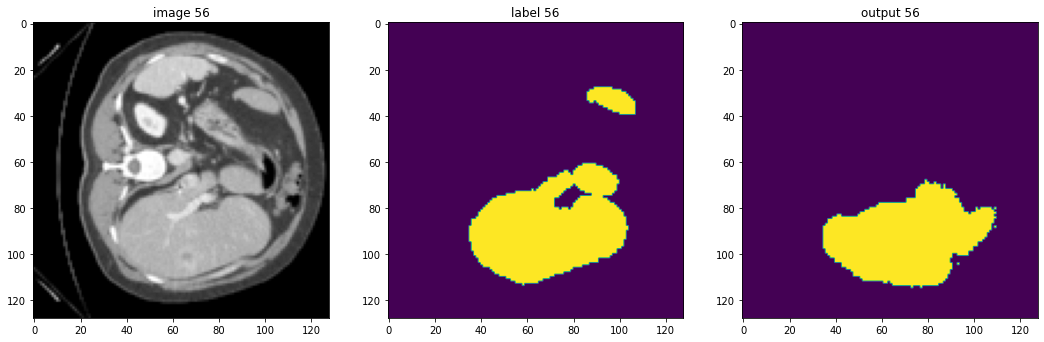

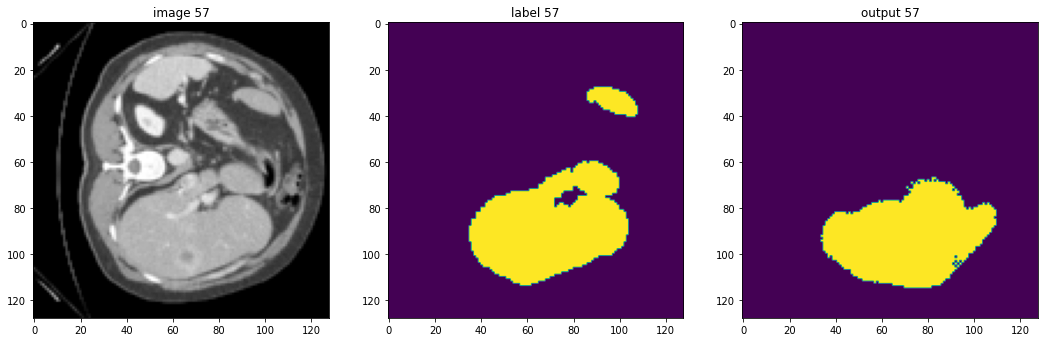

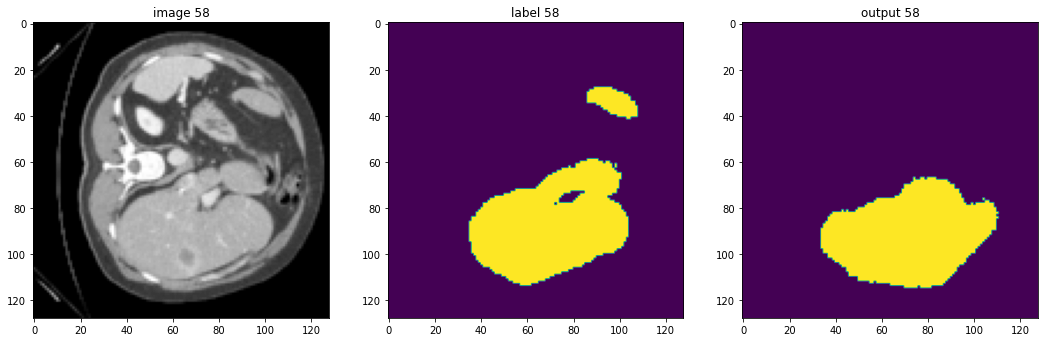

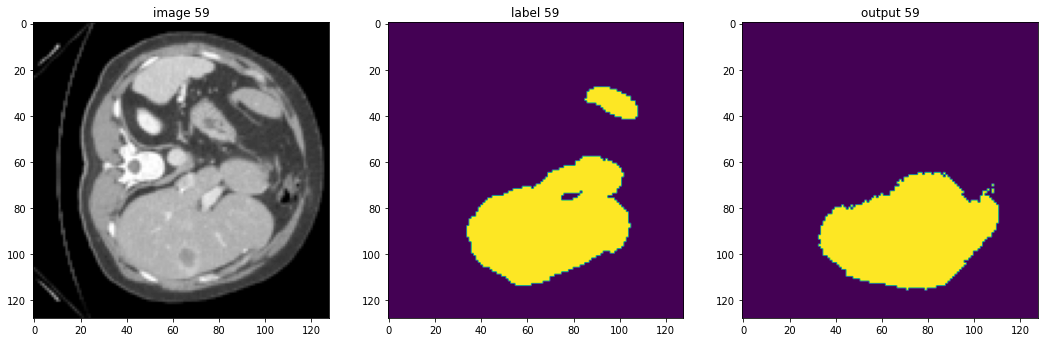

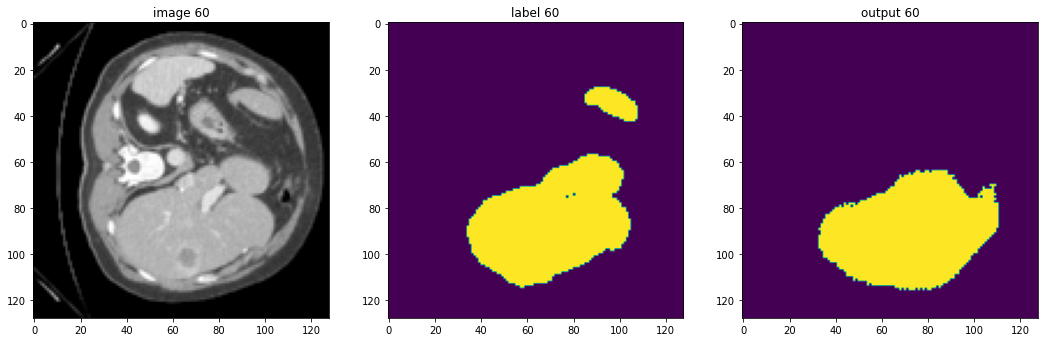

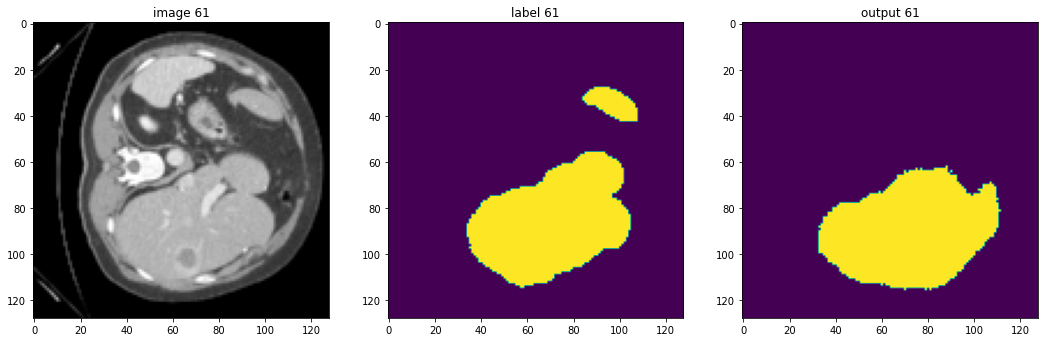

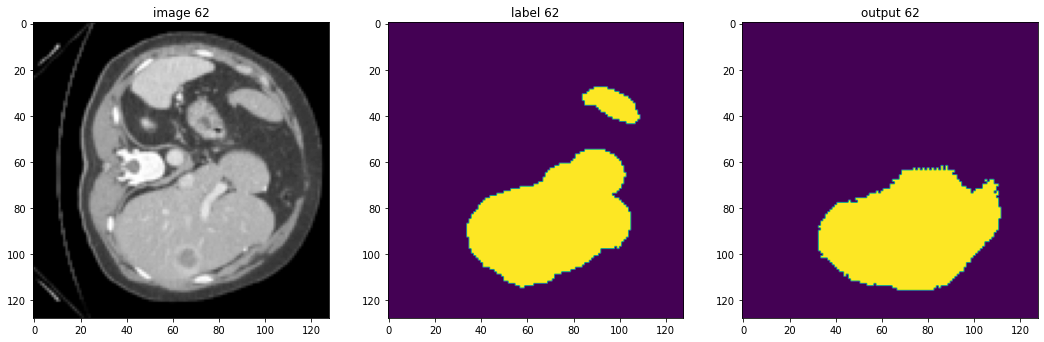

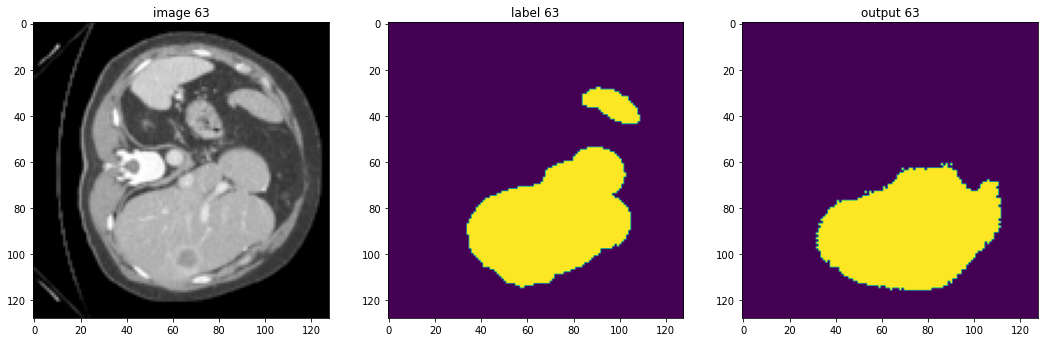

In [89]:
sw_batch_size = 4
roi_size = (128, 128, 64)
with torch.no_grad():
    test_patient = first(test_loader)
    t_volume = test_patient['vol']
    #t_segmentation = test_patient['seg']
    
    test_outputs = sliding_window_inference(t_volume, roi_size, sw_batch_size, model)
    sigmoid_activation = Activations(sigmoid=True)
    test_outputs = sigmoid_activation(test_outputs)
    test_outputs = test_outputs > 0.53
        
    for i in range(31,64): # Here the test_patients Liver images are present in 31-64 images set only
        # plot the slice [:, :, 80]
        plt.figure("check", (18, 6))
        plt.subplot(1, 3, 1)
        plt.title(f"image {i}")
        plt.imshow(test_patient["vol"][0, 0, :, :, i], cmap="gray")
        plt.subplot(1, 3, 2)
        plt.title(f"label {i}")
        plt.imshow(test_patient["seg"][0, 0, :, :, i] != 0)
        plt.subplot(1, 3, 3)
        plt.title(f"output {i}")
        plt.imshow(test_outputs.detach().cpu()[0, 1, :, :, i])
        plt.show()